# Machine Learning in Network Science
Group Challenge

***
by: Leonardo Basili, Paul Bédier, Lasse Schmidt

within: MS Data Sciences & Business Analytics

at: CentraleSupélec & ESSEC Business School
***

### 1. Import Packages

In [28]:
from importlib import reload
reload(analyseData)
reload(prepData)
reload(loadData)
reload(modeling)

<module 'util.preprocess_Data' from 'D:\\Dokumente\\2_Bildung\\2_MSc\\1_Classes\\Y2T2_Machine Learning in Network Science\\3_challenge\\Network-Science_Challenge\\util\\preprocess_Data.py'>

In [1]:
# import own scripts
import util.analyse_Data as analyseData
import util.preprocess_Data as prepData
import util.load_Data as loadData
import util.modeling as modeling

In [2]:
# parse & handle data
import csv
import numpy as np
import pandas as pd
import networkx as nx # graph data

# modeling
from xgboost import XGBClassifier

# evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set matplotlib and seaborn settings for nicer plots
%matplotlib inline

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### 2. Load Data for Modeling

In [15]:
# might take up to a minute
G, G_train, train_tf, val_tf, test, test_tf, X_train, y_train, X_val, y_val, X_trainval, y_trainval, X_test = loadData.load(testing_ratio = 0.33)

Number of positive edges for training: 3596
Number of positive edges for validation: 1621
Number of edges in original graph: 5217
Number of edges in training graph: 3596
The graph is connected


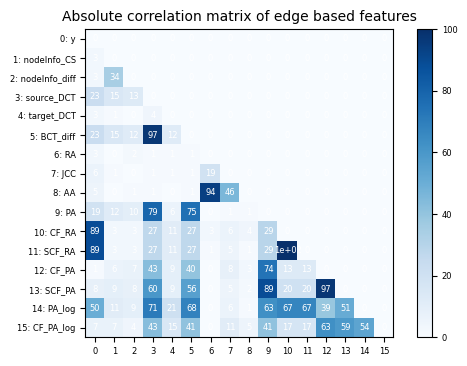

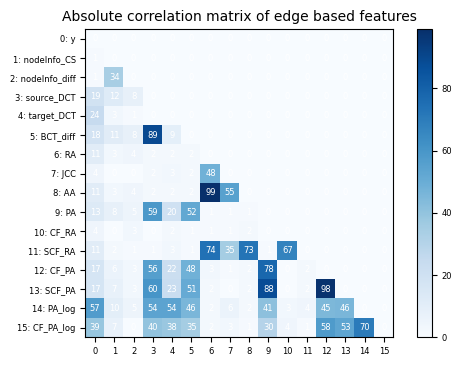

In [16]:
# plot correlation with target (first train, then validation)
for df in [train_tf, val_tf]:
    analyseData.plot_corr_matrix(df.iloc[:, 2:])

In [47]:
X_val.describe()

,nodeInfo_CS,nodeInfo_diff,source_DCT,target_DCT,BCT_diff,RA,JCC,AA,PA,CF_RA,SCF_RA,CF_PA,SCF_PA,PA_log,CF_PA_log
count,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000
mean,0.156427,9.072771,0.002604,0.000739,-0.022711,0.005118,0.007379,0.015934,24.728005,0.009617,0.019852,248.278557,297.734566,1.635445,3.974902
std,0.182826,4.262852,0.011312,0.000790,0.125382,0.042892,0.064657,0.125214,162.841023,0.077650,0.114854,851.738999,1123.271889,1.379416,1.563323
min,0.000000,0.000000,0.000278,0.000278,-0.807469,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,6.000000,0.000000,1.386294
25%,0.000000,6.000000,0.000278,0.000278,-0.005550,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,16.000000,21.000000,0.693147,2.772589
50%,0.117851,8.000000,0.000556,0.000556,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,40.000000,53.000000,1.386294,3.688879
75%,0.272166,12.000000,0.001112,0.000834,0.001111,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,140.000000,177.000000,2.484907,4.941642
max,1.000000,35.000000,0.082036,0.006674,0.550846,0.500000,1.000000,1.442695,7080.000000,1.000000,1.000000,24473.000000,38633.000000,8.865029,10.105326


### 3. Modeling

In [46]:
# basic XGBoost (best to use for RFECV as very short runtime)
clf = XGBClassifier(n_estimators = 50, max_depth = 3, eta = 0.05, reg_alpha = 200)
clf.fit(X_val, y_val)

# predict train
y_train_hat = clf.predict(X_train)
# compute R^2 metric
acc_train = accuracy_score(y_train, y_train_hat)

# predict val
y_val_hat = clf.predict(X_val)
# compute R^2 metric
acc_val = accuracy_score(y_val, y_val_hat)

# print performance
print(f"Acc train: {acc_train}")
print(f"Acc val : {acc_val}")

Acc train: 0.670978627671541
Acc val : 0.7837757232329258


In [10]:
print('Validation performance')
print('-------------------------------------------------------')
print(classification_report(y_val, y_val_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_val, y_val_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_val, y_val_hat))

Validation performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1732
           1       0.98      0.90      0.94      1621

    accuracy                           0.94      3353
   macro avg       0.94      0.94      0.94      3353
weighted avg       0.94      0.94      0.94      3353

Roc_auc score
-------------------------------------------------------
0.9389422604300085

Confusion matrix
-------------------------------------------------------
[[1700   32]
 [ 168 1453]]


In [6]:
# basic XGBoost (best to use for RFECV as very short runtime)
clf = XGBClassifier(n_estimators = 10, max_depth = 3, eta = 0.005, reg_alpha = 1)
clf.fit(X_train, y_train)

# predict train
y_train_hat = clf.predict(X_train)
# compute R^2 metric
acc_train = accuracy_score(y_train, y_train_hat)

# predict val
y_val_hat = clf.predict(X_val)
# compute R^2 metric
acc_val = accuracy_score(y_val, y_val_hat)

# print performance
print(f"Acc train: {acc_train}")
print(f"Acc val : {acc_val}")

Acc train: 0.8061023622047244
Acc val : 0.7593200119296153


In [103]:
# detailed performance analysis
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Validation performance')
print('-------------------------------------------------------')
print(classification_report(y_val, y_val_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_val, y_val_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_val, y_val_hat))

Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      3516
           1       0.82      0.78      0.80      3596

    accuracy                           0.81      7112
   macro avg       0.81      0.81      0.81      7112
weighted avg       0.81      0.81      0.81      7112

Validation performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1732
           1       0.78      0.69      0.74      1621

    accuracy                           0.76      3353
   macro avg       0.76      0.76      0.76      3353
weighted avg       0.76      0.76      0.76      3353

Roc_auc score
-------------------------------------------------------
0.7572076513086754

Confusion matrix
-------------------------------------------------------
[[1422  310]
 [ 497 1124]]


In [105]:
# rerun model on whole training data
clf = XGBClassifier(n_estimators = 10, max_depth = 3, eta = 0.005, reg_alpha = 1)
clf.fit(X_trainval, y_trainval)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.005,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00499999989, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, ...)

In [30]:
# predict test
y_test_hat = clf.predict(X_test)

In [31]:
# save test predictions
save_test = modeling.save_test_preds(test, test_tf, y_test_hat)

In [32]:
save_test.value_counts()

Predicted
1            1811
0            1687
dtype: int64